**Author, Group and Dataset Details:**

S.No. | Author | BITS ID | Group | Dataset | Contribution Percentage |
:-:|:-:|:-:|:-:|:-:|:-:|
1.|Vipin Indoria|2021FC04245|Group 046|PS9 Dry Beans| 100% |
2.|Anuroop Bisaria|2021FC04237|Group 046|PS9 Dry Beans| 100% |
3.| | | | | |

# Super Market Sales Analytics

# Background

This notebook demonstrates how you can analyze the data set, investigate, train a machine learning model, evaluate the result and predict the overall performance using classical machine learning approch based on the features obtained through transactions systems described in next few lines. 

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

# Notebook overview

This notebook consists of several parts. First, we import and configure the required libraries. After that we do Data Visualization and Exploration for data sanity check and exploratory data analysis. After that we prepare the data using Data Pre-processing and cleaning techniques and create the feature store. With the newly created features we create various classification models.

# Dataset

For this project we are using Super Market Sales Dataset, which has following properties:

__Format Type:__
CSV

__Attribute Information:__
+ 1.) Invoice id: Computer generated sales slip invoice identification number
+ 2.) Branch: Branch of supercenter (3 branches are available identified by A, B and C)
+ 3.) City: Location of supercenters
+ 4.) Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card
+ 5.) Gender: Gender type of customer
+ 6.) Product Type: General item categorization groups — Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
+ 7.) Unit price: Price of each product in dollar
+ 8.) Quantity: Number of products purchased by customer
+ 9.) Tax: 5% tax fee for customer buying
+ 10.) Selling Price: Total price including tax
+ 11.) Date: Date of purchase (Record available from January 2019 to March 2019)
+ 12.) Time: Purchase time (10am to 9pm)
+ 13.) Payment Type: Payment used by customer for purchase (3 methods are available — Cash, Credit card and Ewallet)
+ 14.) Cost Price: Cost of goods sold
+ 15.) Gross income: Gross income
+ 16.) Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# 1. Setup

We need to install required libraries and import them.

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import folium

import seaborn as sns

from wordcloud import WordCloud

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import xgboost
import matplotlib.pyplot as plt

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
PROJECT_ROOT = os.path.dirname(os.path.dirname(os.path.abspath("SuperMarketSalesAnalytics.ipynb")))

Now, we will explore and visualize the data and the relationships between attributes.

# 2. Data Visualization and Exploration

Let's start by loading the dataset from our csv file into a Pandas dataframe

In [4]:
data = pd.read_csv(
    os.path.join(PROJECT_ROOT, "data", "Supermarket_Sales_Dataset-1.csv"),
    dtype = {"Invoice ID": "str",
             "Branch": "str",
             "City": "str",
             "Customer Type": "str",
             "Gender": "str",
             "Product Type": "str",
             "Unit Price": "float",
             "Quantity": "int",
             "Tax": "float",
             "Selling Price": "float",
             "Date": "str",
             "Time": "str",
             "Payment Type": "str",
             "Cost Price": "float",
             "Gross Income": "float",
             "Rating": "float"
            },
    parse_dates=['Date']
)

In [5]:
data.dtypes

Invoice ID               object
Branch                   object
City                     object
Customer Type            object
Gender                   object
Product Type             object
Unit Price              float64
Quantity                  int32
Tax                     float64
Selling Price           float64
Date             datetime64[ns]
Time                     object
Payment Type             object
Cost Price              float64
Gross Income            float64
Rating                  float64
dtype: object

In [6]:
data.head(10).style.background_gradient(cmap='GnBu')

,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Date,Time,Payment Type,Cost Price,Gross Income,Rating
0,750-67-8428,A,Bangalore,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,2019-01-05 00:00:00,13:08,Debit card,522.830000,26.141500,9.100000
1,226-31-3081,C,Mysore,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,2019-03-08 00:00:00,10:29,Cash,76.400000,3.820000,9.600000
2,631-41-3108,A,Bangalore,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,2019-03-03 00:00:00,13:23,Credit card,324.310000,16.215500,7.400000
3,123-19-1176,A,Bangalore,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,2019-01-27 00:00:00,20:33,Debit card,465.760000,23.288000,8.400000
4,373-73-7910,A,Bangalore,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,2019-02-08 00:00:00,10:37,Debit card,604.170000,30.208500,5.300000
5,699-14-3026,C,Mysore,Normal,Male,Electronic accessories,85.390000,7,29.886500,627.616500,2019-03-25 00:00:00,18:30,Debit card,597.730000,29.886500,4.100000
6,355-53-5943,A,Bangalore,Member,Female,Electronic accessories,68.840000,6,20.652000,433.692000,2019-02-25 00:00:00,14:36,Debit card,413.040000,20.652000,5.800000
7,315-22-5665,C,Mysore,Normal,Female,Home and lifestyle,73.560000,10,36.780000,772.380000,2019-02-24 00:00:00,11:38,Debit card,735.600000,36.780000,8.000000
8,665-32-9167,A,Bangalore,Member,Female,Health and beauty,36.260000,2,3.626000,76.146000,2019-01-10 00:00:00,17:15,Credit card,72.520000,3.626000,7.200000
9,692-92-5582,B,Mangalore,Member,Female,Food and beverages,54.840000,3,8.226000,172.746000,2019-02-20 00:00:00,13:27,Credit card,164.520000,8.226000,5.900000


**Key Observations:**

* The first field is the 'Invoice ID' attribute that we will want to drop before batch inference and add to the final inference output next to the probability of classification.
* Last field, 'Rating', is an indicator of the actual experience of customers shooping in Super Market.
* There are 14 other numeric/categorical features that we will use for training and inferencing.
* Need to replace the Categorical values with a numeric label values.

The first step is to use a histogram to see how the values of individual attributes are distributed, as well as compute summary statistics for numeric attributes such as mean, min values, max values, standard deviations, etc.

For categorical variables we need to see frequency tables.

While there are several ways to do this in Python - we are going to use the following pandas functions:hist(),describe(),crosstab(), andselect_dtypes().

To show the histograms right in the Jupyter notebook, we will also use the %matplotlib inline magic function of IPython.

col_0,% observations
Branch,
A,0.340
B,0.332
C,0.328


# of unique values 3


col_0,% observations
City,
Bangalore,0.340
Mangalore,0.332
Mysore,0.328


# of unique values 3


col_0,% observations
Customer Type,
Member,0.501
Normal,0.499


# of unique values 2


col_0,% observations
Gender,
Female,0.501
Male,0.499


# of unique values 2


col_0,% observations
Product Type,
Electronic accessories,0.170
Fashion accessories,0.178
Food and beverages,0.174
Health and beauty,0.152
Home and lifestyle,0.160
Sports and travel,0.166


# of unique values 6


col_0,% observations
Payment Type,
Cash,0.344
Credit card,0.311
Debit card,0.345


# of unique values 3


,Unit Price,Quantity,Tax,Selling Price,Cost Price,Gross Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


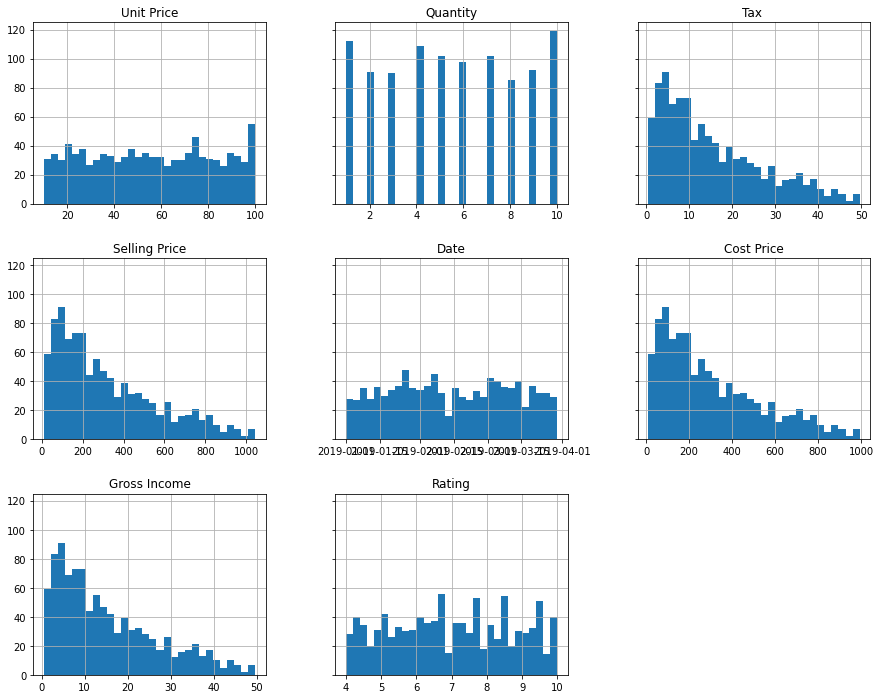

In [7]:
# show frequency tables for each categorical feature and counts of unique values
for column in data.select_dtypes(include=['object']).columns:
    if column not in ['Invoice ID', 'Date', 'Time']:
        display(pd.crosstab(index=data[column],
                            columns='% observations', 
                            normalize='columns'))
        print("# of unique values {}".format(data[column].nunique()))

# show summary statistics
display(data.describe())

# build histograms for each numeric feature
hist = data.hist(bins=30, sharey=True, figsize=(15, 12))

We can see immediately that:
* Most of the numeric features are having skewed distribution.


Now that we've seen the distribution of Super Market Sales's attributes, it's time to look at each feature using `Uni-variate Analysis` and these relate to others using `Bi-variate Analysis`

In [8]:
# Plot the Superstore location on map for geographical insights
cities = pd.DataFrame({'city': ['Bangalore', 'Mangalore', 'Mysore'],
                       'Latitude': [12.9716, 12.9141, 12.2958],
                       'Longitude' : [77.5946, 74.8560, 76.6394]})

market_map = folium.Map(location = [12.9716, 77.5946], zoom_start = 7, tiles = 'CartoDB Positron', control_scale = True)

plt.figure(figsize=(800,600));

for (i, j) in cities.iterrows():
    folium.Marker(location = [j.loc['Latitude'], j.loc['Longitude']], popup = j.loc['city'],tooltip = 'click', 
                  icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(market_map)
market_map

<Figure size 57600x43200 with 0 Axes>

Based on the location `Branch B` store is located on coastal area city `Mangalore`, `Branch A` store in major IT city `Bangalore` and `Branch C` store in major tourist city `Mysure` hence the purchasing behaviour of customers might be different based on geographical insights.

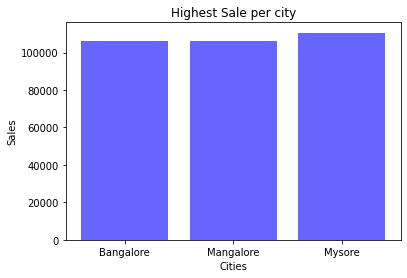

In [9]:
# Total sales in all 3 branches
sale=data.groupby('City').sum()['Selling Price'] #Y-values
cities=[city for city, data in data.groupby('City')] #X-values

# Plot
plt.bar(cities,sale,color='blue',alpha=.6)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.title('Highest Sale per city')
plt.show()

There is no much of a difference in sales across all the branches Bangalore(A), Mangalore(B) and Mysure(C). But, the sales in Branch C - Mysure is a bit higher than the rest of the branches.

In [10]:
# Convert date columns into date time 
data.Date = pd.to_datetime(data.Date)

#Add a month,day and weekday columns
data['month']=data.Date.dt.month
data['day']=data.Date.dt.day
data['weekday']=data.Date.dt.day_name()

#Add a hour and minute columns 
data['hour']=data.Time.str[0:2]
data['minute']=data.Time.str[3:5]

#Make it int values
data['hour']=pd.to_numeric(data['hour'])
data['minute']=pd.to_numeric(data['minute'])

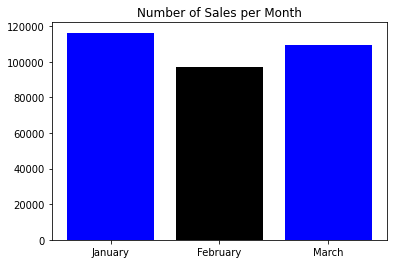

In [11]:
# Month wise total sales
sale=data.groupby('month').sum()['Selling Price']
month=['January','February','March']
c=['b','k','b']

#Plot
plt.figure(figsize=(6,4))
plt.bar(month,sale,color=c)
plt.title('Number of Sales per Month')
plt.show()

The supermarket performs well in January. It has a decrease in transactions in February and bounces back in March.

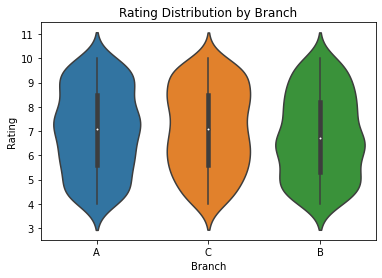

In [12]:
plt.title('Rating Distribution by Branch')
sns.violinplot('Branch','Rating',data=data);

- Branch A has received the most positive rating due to the tapered shape toward the middle between the values 6 to 9.
- Branch B has the most negative rating due to the tapered shape between the values 4 to 6.
- Branch C has almost equal positive and negative ratings between the value 4 to 6 and 8 to 10

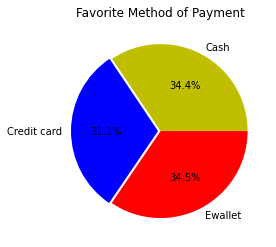

In [13]:
# Parameters for plotting
method=data.groupby('Payment Type').count()['Selling Price']
payment=['Cash','Credit card','Ewallet']
c=['y','b','r']

# Plot 
plt.pie(method,colors=c,labels=payment,explode=[0,0.03,0],autopct='%1.1f%%')
plt.title('Favorite Method of Payment')
plt.show()

The most popular payment method is in-fact E-wallet and not credit cards. Cash payment is also popular.

<AxesSubplot:title={'center':'Customer Transaction per Hour'}, xlabel='hour', ylabel='Selling Price'>

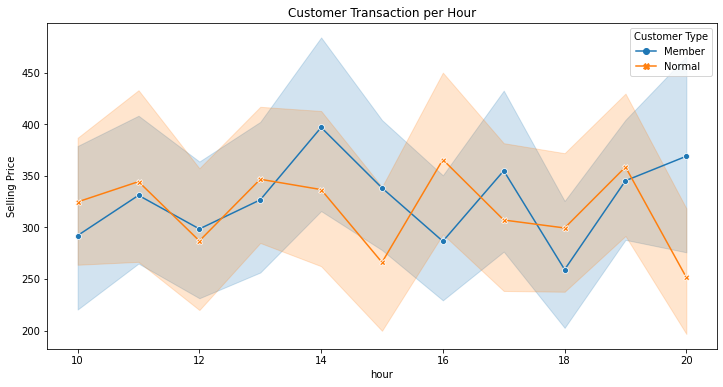

In [14]:
plt.figure(figsize=(12,6))
plt.title('Customer Transaction per Hour')
sns.lineplot(data=data,x='hour',y='Selling Price',hue='Customer Type',markers=True,style='Customer Type',dashes=False)

The Normal customers and the members like to shop around noon but members have the highest number of transactions at 2 pm.
Around 4 pm and 9 pm, the normal customers shop the most.

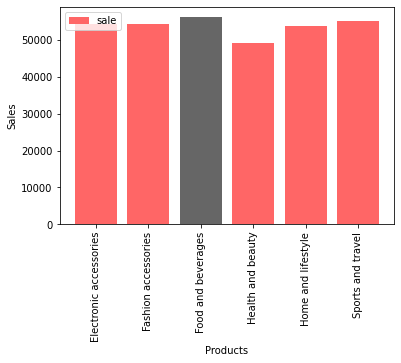

In [15]:
#Parameters
sale_product=data.groupby('Product Type').sum()['Selling Price']
products =[product for product, data in data.groupby('Product Type')]
c=['r','r','k','r','r','r']
#Plot the graph

plt.bar(products,sale_product,alpha=0.6,color=c)
plt.xticks(products, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.legend(['sale'],loc='upper left')
plt.show()

Food and beverages has the hishest sales.

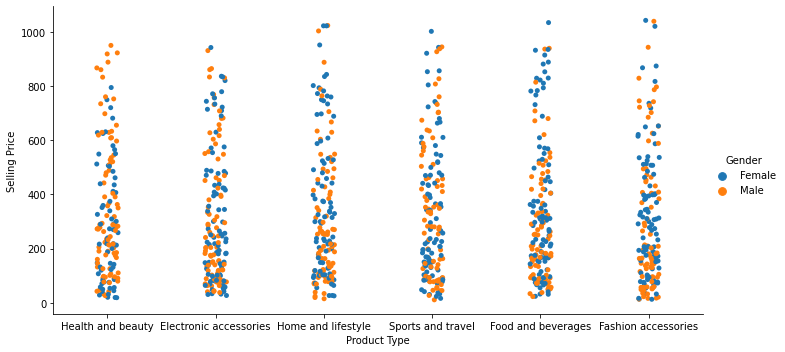

In [16]:
# Visualizing a Gender based comparison related to Product Type
sns.catplot(x='Product Type', y='Selling Price', hue='Gender',data=data,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Selling Price')
plt.show()

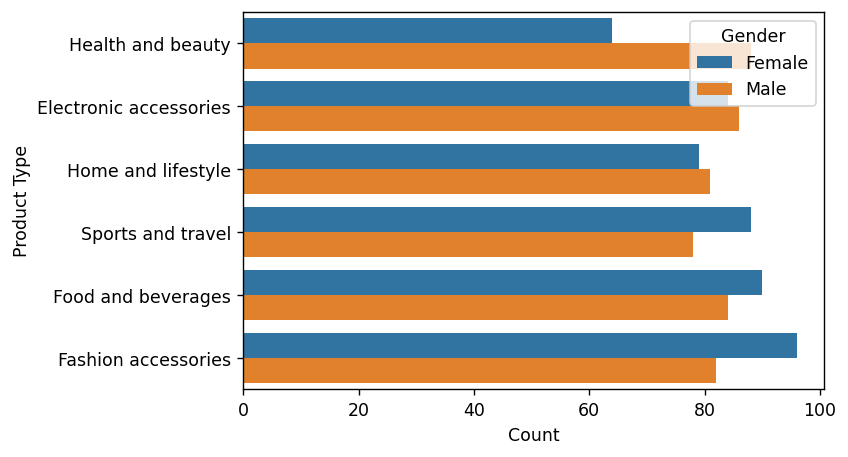

In [17]:
plt.figure(dpi=125)
sns.countplot(y ='Product Type', hue = "Gender", data = data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Well, In Health & Beauty, Males are much more than Females whereas in Fashion accessories , Food & beverages and Sports & Travel Females are more and in the rest there is not much significant difference.

In [18]:
# Visualizing a City based comparison related to Product Type

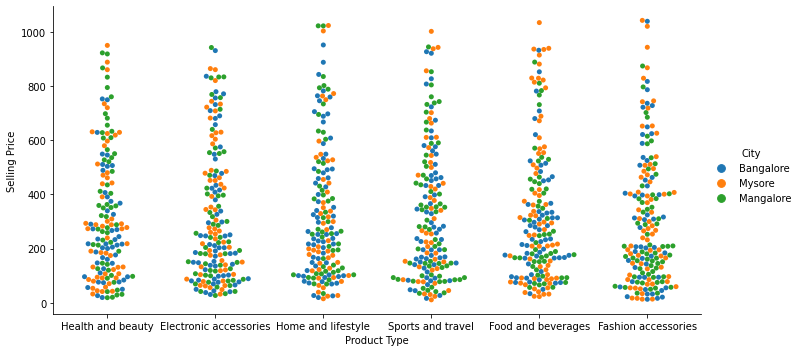

In [19]:
sns.catplot(x='Product Type',y='Selling Price',hue='City',kind='swarm',data=data,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Selling Price')
plt.show()

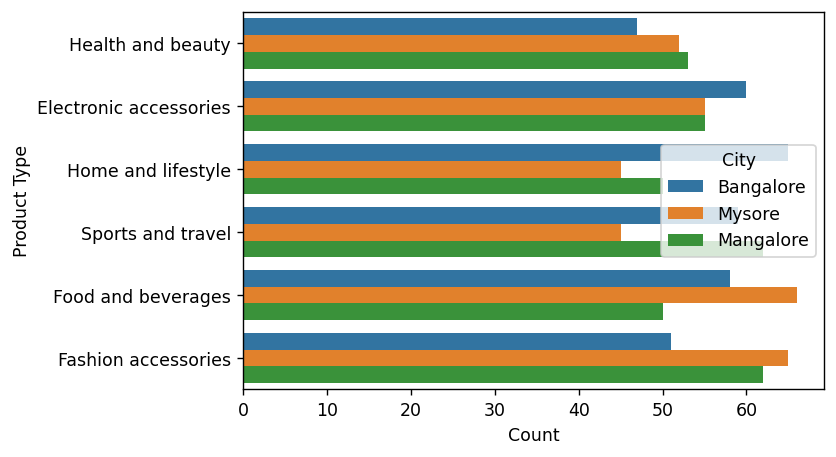

In [20]:
plt.figure(dpi=125)
sns.countplot(y ='Product Type', hue = "City", data = data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Well, Bangalore being a major IT hub leads at Home & Lifestyle and Electronic accessories. Mysore being a tourist city leads at Food & Bevaerages and Fashion accessories. Mangalore being a coastal city leads at Sports & Travel and Health & Beauty.

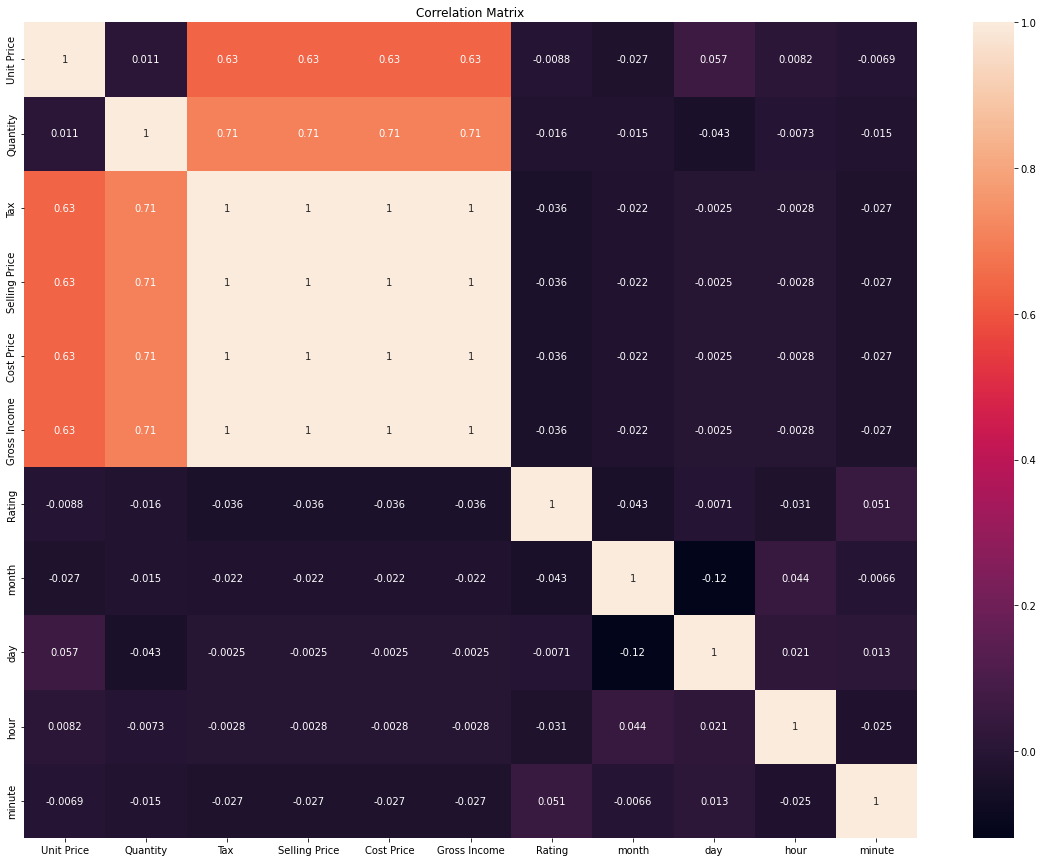

In [21]:
#Create a correlation matrix
corr_df=data.corr()

plt.figure(figsize=(20,15))
plt.title('Correlation Matrix')
sns.heatmap(corr_df,annot=True)
plt.show()

The best correlated are Tax 5%, Total, Gross Income and cogs i.e Cost of Goods sold with a correlation of 1.
Also, the above mentioned all has a good correlation of 0.71 with Quantity.

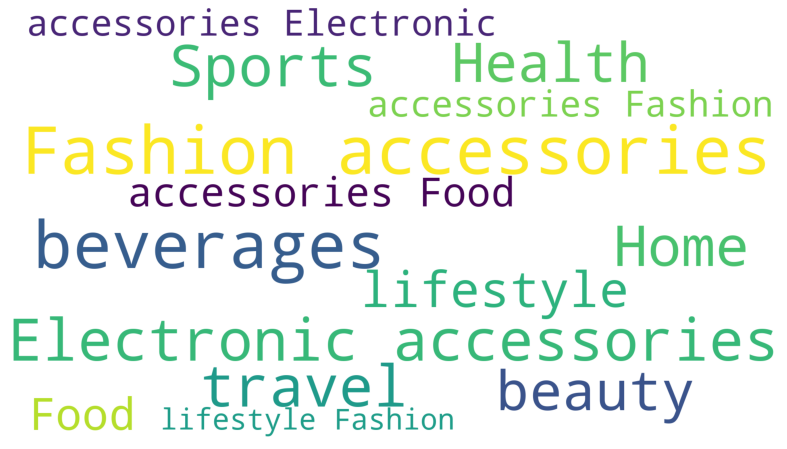

In [22]:
# Word cloud of product type (Occurance plot)
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(data['Product Type']))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('cast.png')
plt.show()

# 3. Data pre-processing and cleaning

In a dataset, we often see the presence of empty cells, rows, and columns, also referred to as Missing values. They make the dataset inconsistent and unable to work on. Many machine learning algorithms return an error if parsed with a dataset containing null values. Detecting and treating missing values is essential while analyzing and formulating data for any purpose.

There are several ways to detect missing values in Python. isnull() function is widely used for the same purpose.

In [23]:
#returns sum of null values per column
print("Column wise number of missing values count:")
print(data.isnull().sum())

#return sum of all null values in dataset
print(f"\nTotal missing values in dataset: {data.isnull().sum().sum()}")


Column wise number of missing values count:
Invoice ID       0
Branch           0
City             0
Customer Type    0
Gender           0
Product Type     0
Unit Price       0
Quantity         0
Tax              0
Selling Price    0
Date             0
Time             0
Payment Type     0
Cost Price       0
Gross Income     0
Rating           0
month            0
day              0
weekday          0
hour             0
minute           0
dtype: int64

Total missing values in dataset: 0


After acknowledging, that there are no null/missing values in our dataset, we can go deeper with our analysis.

In [24]:
# Filter out the Grass Income as its same as Tax column having 1 correlation
data.drop('Gross Income', axis=1, inplace=True)

In [25]:
# Filter out Branch Column as it has same values as City
data.drop('Branch', axis=1, inplace=True)

In [26]:
# Create a new field called “Timeslot” was created to have the timeslot (morning, afternoon, evening, and night) for
# generating better insights from the dataset.
def categorise_timeslot(row):
    t = row['hour'] + 0.01 * row['minute']
    if t >= 10.00 and t <= 11.59:
        return 'Morning'
    elif t >= 12.00 and t <= 17.00:
        return 'Afternoon'
    elif t >= 17.01  and t <= 19.00:
        return 'Evening'
    return 'Night'
data['Timeslot'] = data.apply(lambda row: categorise_timeslot(row), axis=1)

In [27]:
# discretization on rating column
data['Discret Rating'] = data.apply(lambda row: round(row['Rating']), axis=1)

In [28]:
# Filter out the redundant columns
data.drop(['Date', 'Time', 'hour', 'minute', 'Rating'], axis=1, inplace=True)

In [29]:
# Split the Invoice ID column which is unique identifier from rest of the attributes and later to be merged
invoice_id = data[['Invoice ID']]

In [30]:
data.drop('Invoice ID', axis=1, inplace=True)

We chose to predict the gender of buyer while taking some of the features from the dataset.

In [31]:
# Split data into features and target, x=features and y=target
y = data['Gender']
x = data.drop('Gender',axis=1)

In [32]:
# Apply one hot encoding technique to convert categorical columns into numerical
ohe_x = pd.get_dummies(x, prefix=['City', 'Customer_Type', 'Product_Type', 'Payment_Type', 'Weekday', 'Timeslot'])

In [33]:
ohe_x.head(10).style.background_gradient(cmap='GnBu')

,Unit Price,Quantity,Tax,Selling Price,Cost Price,month,day,Discret Rating,City_Bangalore,City_Mangalore,City_Mysore,Customer_Type_Member,Customer_Type_Normal,Product_Type_Electronic accessories,Product_Type_Fashion accessories,Product_Type_Food and beverages,Product_Type_Health and beauty,Product_Type_Home and lifestyle,Product_Type_Sports and travel,Payment_Type_Cash,Payment_Type_Credit card,Payment_Type_Debit card,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Timeslot_Afternoon,Timeslot_Evening,Timeslot_Morning,Timeslot_Night
0,74.690000,7,26.141500,548.971500,522.830000,1,5,9,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,15.280000,5,3.820000,80.220000,76.400000,3,8,10,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,46.330000,7,16.215500,340.525500,324.310000,3,3,7,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,58.220000,8,23.288000,489.048000,465.760000,1,27,8,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,86.310000,7,30.208500,634.378500,604.170000,2,8,5,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0
5,85.390000,7,29.886500,627.616500,597.730000,3,25,4,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
6,68.840000,6,20.652000,433.692000,413.040000,2,25,6,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
7,73.560000,10,36.780000,772.380000,735.600000,2,24,8,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
8,36.260000,2,3.626000,76.146000,72.520000,1,10,7,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
9,54.840000,3,8.226000,172.746000,164.520000,2,20,6,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0


In [34]:
# Normalize the Unit Price, Quantity, Tax, Selling Price, Cost Price Column by applying Z-Score Normalization
#for column in ['Unit Price', 'Quantity', 'Tax ', 'Selling Price', 'Cost Price', 'month', 'day','Discret Rating']:
#    ohe_x[column] = (ohe_x[column] - ohe_x[column].mean()) / ohe_x[column].std()

In [35]:
#ohe_x.head(10).style.background_gradient(cmap='GnBu')

When building a machine learning model in real-life, it’s almost rare that all the variables in the dataset are useful to build a model. Adding redundant variables reduces the generalization capability of the model and may also reduce the overall accuracy of a classifier. Furthermore adding more and more variables to a model increases the overall complexity of the model.

As per the Law of Parsimony of ‘Occam’s Razor’, the best explanation to a problem is that which involves the fewest possible assumptions. Thus, feature selection becomes an indispensable part of building machine learning models.

We can summarize feature selection as follows.
  
1. Unsupervised: Do not use the target variable for selecting the feature importance of Input variable (e.g. remove redundant variables).  
          * Correlation  
2. Supervised: Use the target variable (e.g. remove irrelevant I/P features).  
          * Wrapper Method: Search for well-performing subsets of features.  
                Recursive Feature Elimination (RFE)  
          * Filter Method: Select subsets of features based on their relationship with the target.  
                Statistical Methods  
                Feature Importance Methods  
          * Intrinsic: Algorithms that perform automatic feature selection during training.  
                Decision Trees  


Correlation Matrix

    Correlation states how the features are related to each other or the target variable.

    Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

    Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

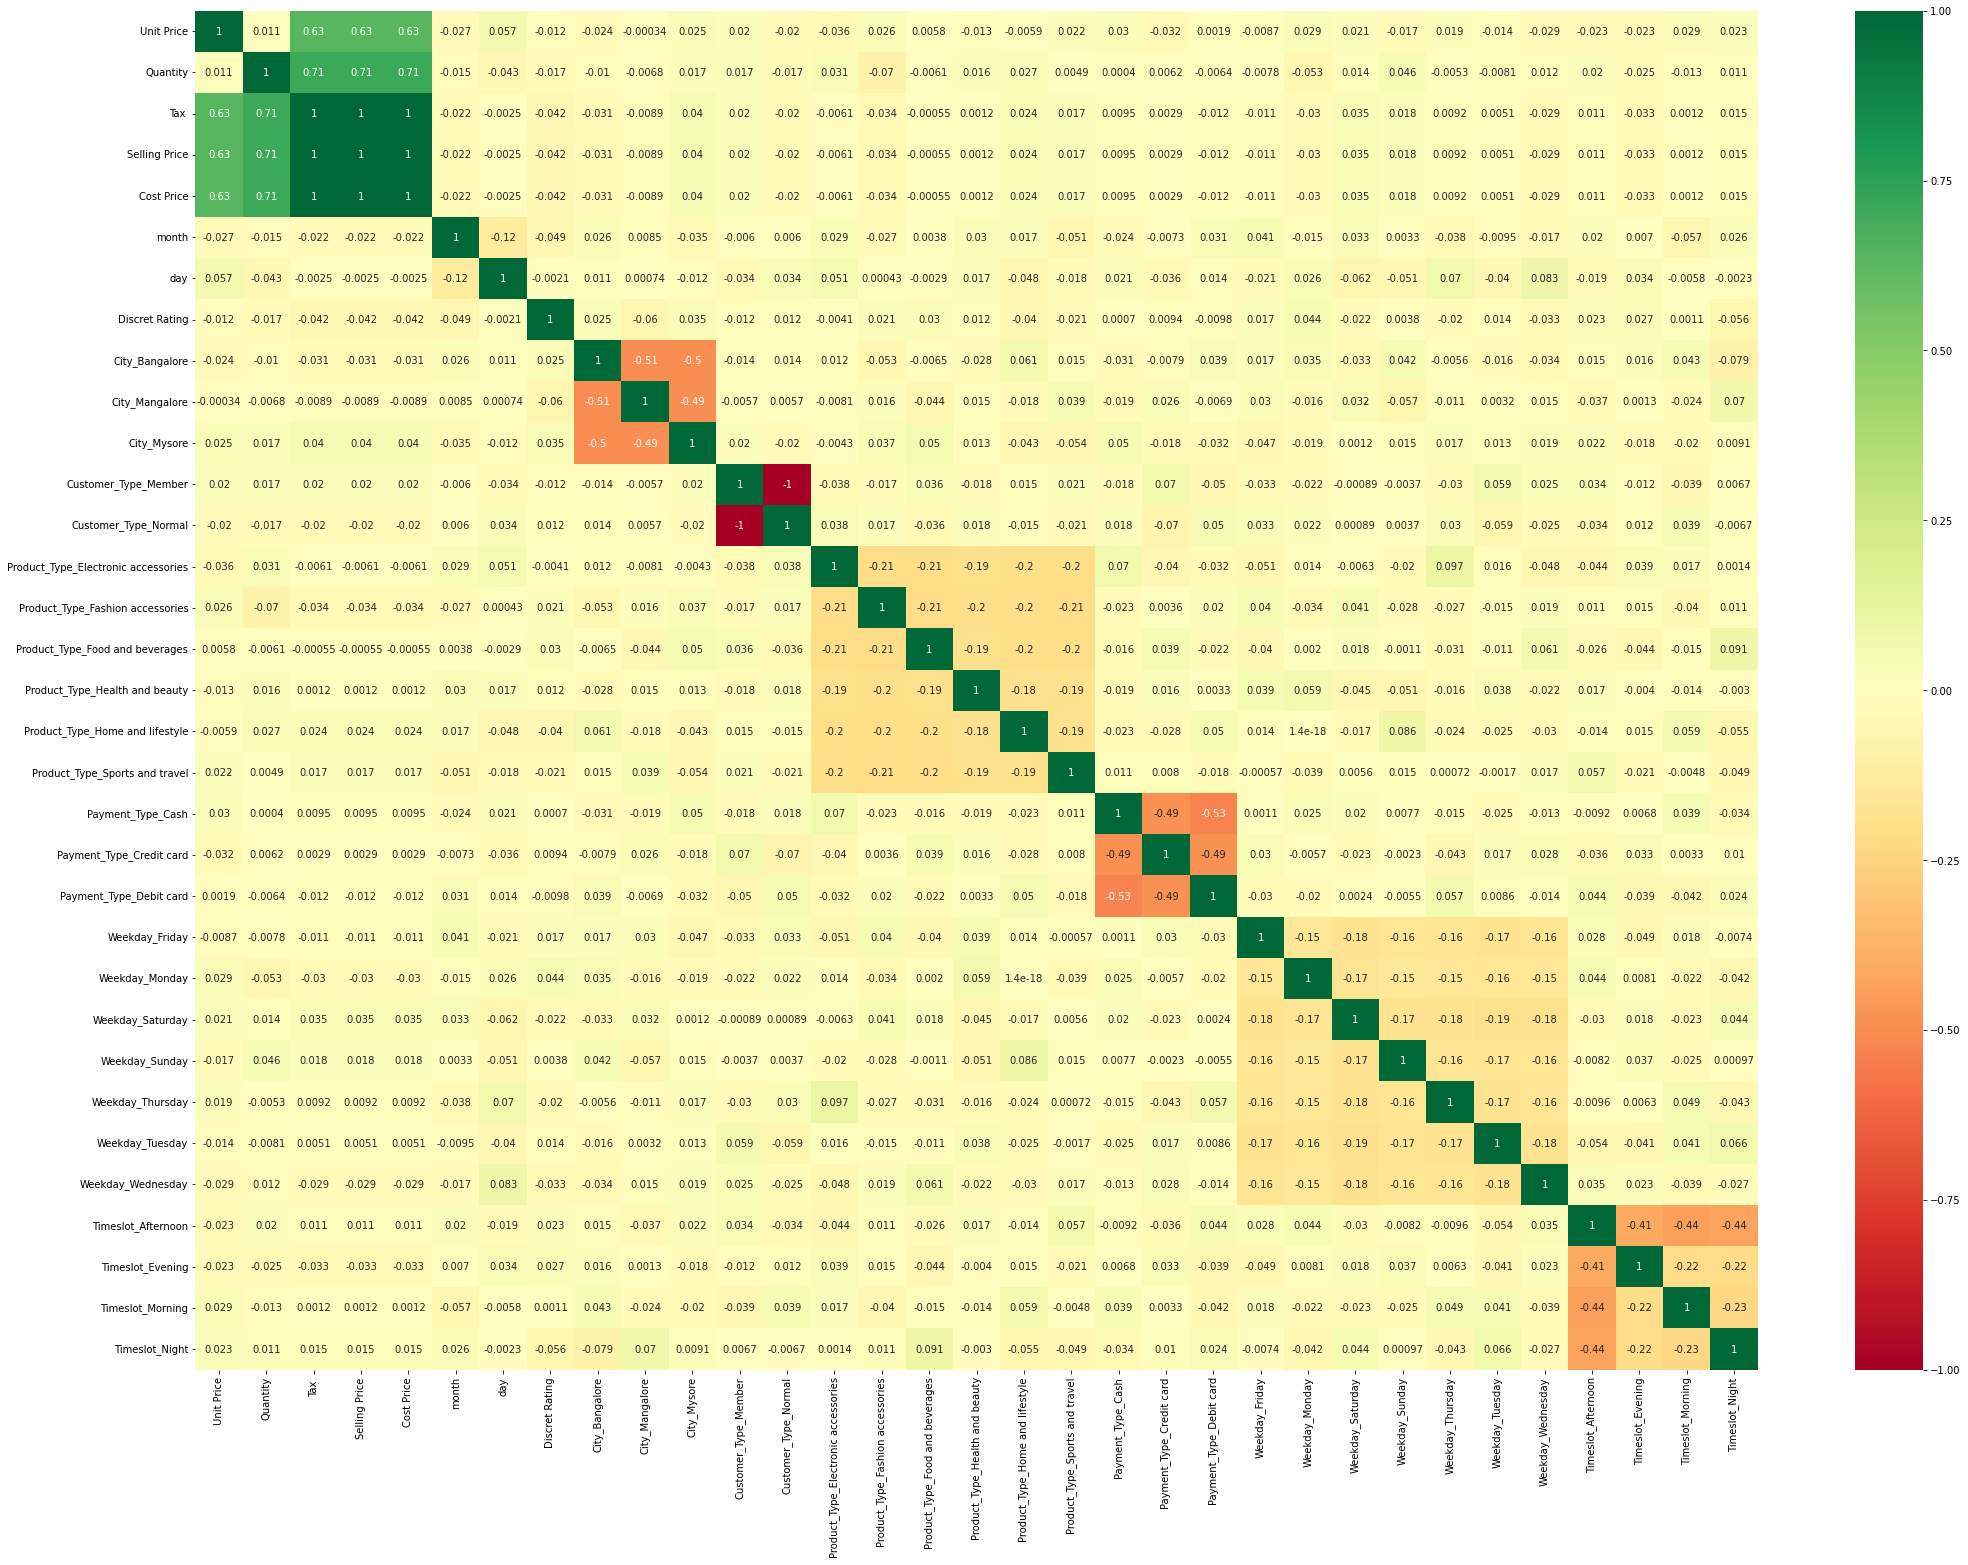

In [36]:
#get correlations of each features in dataset
corrmat = ohe_x.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(35,25))

#plot heat map
g=sns.heatmap(ohe_x[top_corr_features].corr(),annot=True,cmap="RdYlGn")

From above correlation plot we can conclude that the feature 'Tax', 'Selling Price' and 'Cost Price' are highly correlated features which can also be related with the buying situation. As Selling Price of your purchase increases Tax and Cost Price also gets increases. Hence as per feature selection we can keep Selling Price and dropping other two columns.

In [37]:
ohe_x.drop(['Tax ', 'Cost Price'], axis=1, inplace=True)

### Feature Selection Method-1 (Chi-Square Statistical Analysis)

* Statistical tests can be used to select those features that have the strongest relationship with the output variable.

* The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

* The example below uses the chi-squared (chi²) statistical test for non-negative features to select k of the best features.


In [38]:
def get_m1_k_best_features(attributes, target, k=8, score_func=chi2):
    features = SelectKBest(score_func=score_func, k=k)
    fit = features.fit(attributes, target)
    df_scores = pd.DataFrame(fit.scores_)
    df_columns = pd.DataFrame(attributes.columns)
    f_Scores = pd.concat([df_columns, df_scores], axis=1)
    f_Scores.columns = ['Attributes', 'Score']
    f_Scores = f_Scores.sort_values(by=['Score'], ascending=False).head(k)
    return f_Scores

In [39]:
# Apply SelectKBest class to extract top 8 best features
m1_top8_f = get_m1_k_best_features(ohe_x, y, k=8)
m1_top8_f.style.background_gradient(cmap='GnBu')

,Attributes,Score
2,Selling Price,457.322841
4,day,12.951738
1,Quantity,8.544557
14,Product_Type_Health and beauty,3.886097
29,Timeslot_Morning,3.709533
0,Unit Price,3.004681
8,City_Mysore,2.279565
30,Timeslot_Night,2.007237


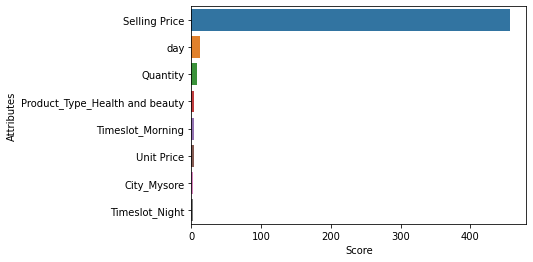

In [40]:
# Plot
ax = sns.barplot(x="Score", y="Attributes", data=m1_top8_f)

In [41]:
# Apply SelectKBest class to extract top 6 best features
m1_top6_f = m1_top8_f.head(6)
m1_top6_f.style.background_gradient(cmap='GnBu')

,Attributes,Score
2,Selling Price,457.322841
4,day,12.951738
1,Quantity,8.544557
14,Product_Type_Health and beauty,3.886097
29,Timeslot_Morning,3.709533
0,Unit Price,3.004681


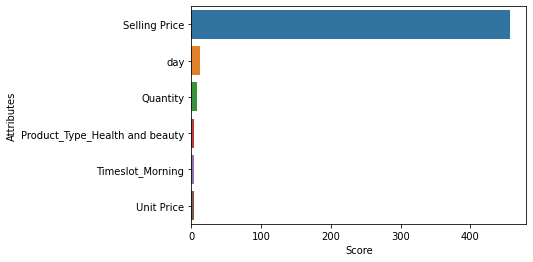

In [42]:
# Plot
ax = sns.barplot(x="Score", y="Attributes", data=m1_top6_f)

In [43]:
# Apply SelectKBest class to extract top 5 best features
m1_top5_f = m1_top8_f.head(5)
m1_top5_f.style.background_gradient(cmap='GnBu')

,Attributes,Score
2,Selling Price,457.322841
4,day,12.951738
1,Quantity,8.544557
14,Product_Type_Health and beauty,3.886097
29,Timeslot_Morning,3.709533


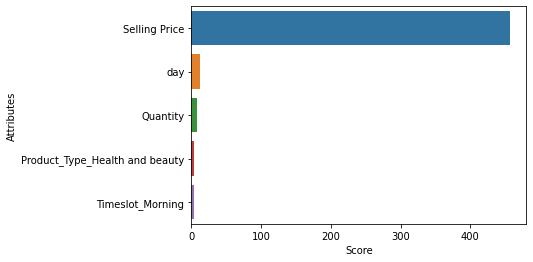

In [44]:
# Plot
ax = sns.barplot(x="Score", y="Attributes", data=m1_top5_f)

Using Above score we can conclude that 'Selling Price' is the most important feature among all the features which is also true in practical scenario.

### Feature Selection Method-2 (Feature Importance)

* You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

* Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

* Feature importance is an inbuilt class that comes with Tree Based Classifiers, but here in this example I will be using XGB Classifier for extracting the top features for the dataset.


In [45]:
def get_m2_k_best_features(attributes, target, k=8):
    model = xgboost.XGBClassifier()
    model.fit(attributes, target)
    
    df_scores = pd.DataFrame(model.feature_importances_)
    df_columns = pd.DataFrame(attributes.columns)
    f_Scores = pd.concat([df_columns, df_scores], axis=1)
    f_Scores.columns = ['Attributes', 'Score']
    f_Scores = f_Scores.sort_values(by=['Score'], ascending=False).head(k)
    return f_Scores

In [46]:
from sklearn.preprocessing import LabelEncoder

le_y = LabelEncoder().fit_transform(y)

In [47]:
# Apply SelectKBest class to extract top 8 best features
m2_top8_f = get_m2_k_best_features(ohe_x, le_y, k=8)
m2_top8_f.style.background_gradient(cmap='GnBu')

,Attributes,Score
23,Weekday_Sunday,0.047543
29,Timeslot_Morning,0.045109
20,Weekday_Friday,0.040521
19,Payment_Type_Debit card,0.039047
14,Product_Type_Health and beauty,0.038203
16,Product_Type_Sports and travel,0.037806
15,Product_Type_Home and lifestyle,0.037634
22,Weekday_Saturday,0.037610


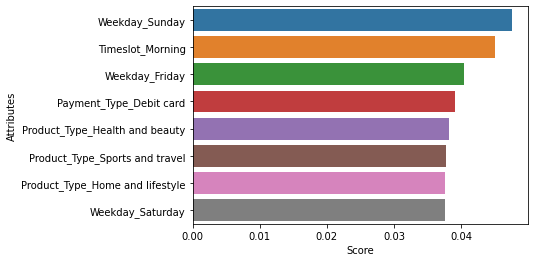

In [48]:
# Plot
ax = sns.barplot(x="Score", y="Attributes", data=m2_top8_f)

In [49]:
# Apply SelectKBest class to extract top 6 best features
m2_top6_f = m2_top8_f.head(6)
m2_top6_f.style.background_gradient(cmap='GnBu')

,Attributes,Score
23,Weekday_Sunday,0.047543
29,Timeslot_Morning,0.045109
20,Weekday_Friday,0.040521
19,Payment_Type_Debit card,0.039047
14,Product_Type_Health and beauty,0.038203
16,Product_Type_Sports and travel,0.037806


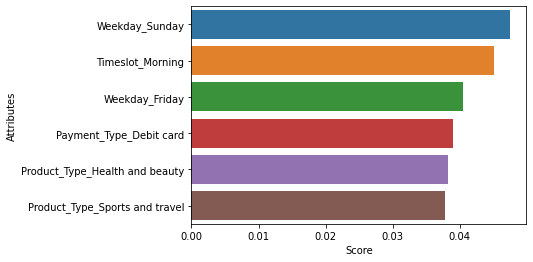

In [50]:
# Plot
ax = sns.barplot(x="Score", y="Attributes", data=m2_top6_f)

In [51]:
# Apply SelectKBest class to extract top 5 best features
m2_top5_f = m2_top8_f.head(5)
m2_top5_f.style.background_gradient(cmap='GnBu')

,Attributes,Score
23,Weekday_Sunday,0.047543
29,Timeslot_Morning,0.045109
20,Weekday_Friday,0.040521
19,Payment_Type_Debit card,0.039047
14,Product_Type_Health and beauty,0.038203


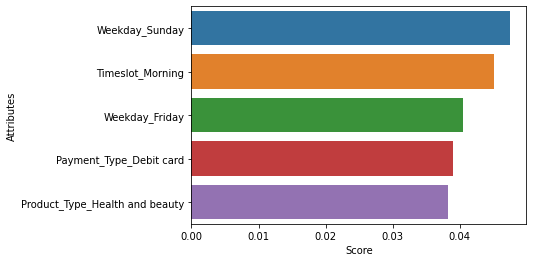

In [52]:
# Plot
ax = sns.barplot(x="Score", y="Attributes", data=m2_top5_f)

Using Above score we can conclude that 'Weekday Sunday' is the most important feature among all the features which is also true in practical scenario.

# 4. Machine Learning Models

## Random Forest

In [53]:
df_le_y = pd.DataFrame(le_y, columns = ['Gender'])

In [54]:
# 80-20 Training split, for convention
from sklearn.model_selection import train_test_split

data = ohe_x[[
    'Weekday_Sunday',
    'Timeslot_Morning',
    'Weekday_Friday',
    'Payment_Type_Debit card',
    'Product_Type_Health and beauty'
]]

label = df_le_y

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=np.random.RandomState())

In [55]:
# Initialize Random Forest Model
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [56]:
# Initialize Random Forest Hyperparameter Tuning
n_estimators = [5,20,50,100]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4] 
bootstrap = [True, False] 

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [57]:
# Randomized Search Cross-Validation for Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV



rf_random = RandomizedSearchCV(
    estimator = RandomForestClassifier(),
    param_distributions = random_grid,
    n_iter = 100,
    cv = 5,
    verbose=2,
    random_state=np.random.RandomState(),
    n_jobs = -1
)



rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=RandomState(MT19937) at 0x2964CDD2C40,
                   verbose=2)

In [58]:
print('Random grid: ', random_grid, '\n')
print('Best Parameters: ', rf_random.best_params_, ' \n')
print('Best Score: ', rf_random.best_score_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}  

Best Score:  0.5194029850746269  



In [59]:
# Assign best hyperparams to RF Model
model_rf = RandomForestClassifier(**rf_random.best_params_)

In [60]:
# K-Fold CV
from sklearn.model_selection import KFold, cross_validate

scoring = [
    'accuracy',
    'precision_weighted',
    'recall_weighted',
    'f1_weighted',
]

kfold = KFold(n_splits=5, shuffle=True, random_state=np.random.RandomState())
cv_results = cross_validate(model_rf, X_train, y_train, cv=kfold, scoring=scoring)
cvr_df = pd.DataFrame(cv_results)
cvr_df.mean()

fit_time                   0.023545
score_time                 0.005579
test_accuracy              0.495522
test_precision_weighted    0.515990
test_recall_weighted       0.495522
test_f1_weighted           0.471594
dtype: float64